# Introduction to Machine Learning
Machine Learning (ML) is a subset of Artificial Intelligence (AI) that provides systems the ability to automatically learn and infer _patterns_ or _trends_ without being explicitly programmed (i.e hardcoding `if` statements). 

ML Algorithms are often categorized as Supervised or Unsupervised.
- Supervised Learning: an approach defined by its use of labeled datasets. These datasets are designed to train or supervise algorithms into classifying data or predicting outcomes accurately. Using labeled inputs and outputs, the model can measure its accuracy and learn over time.
- Unsupervised Learning: an approach which primarily works on unlabeled data sets to _cluster_ or _group_ similar data points together. These algorithms discover hidden patterns in data without the need for human intervention.

For this workshop, we will focus on two Supervised Learning algorithms:
- Decision Trees
- Linear Regression

Some examples of other models you have covered in lectures include:
- Multiple Linear Regression (Regression based Supervised Learning)
- $k$-Nearest Neighbors (Clustering based Unsupervised Learning)
- $k$-Means (Clustering based Unsupervised Learning)

## Classification
Classification is the task of approximating some mapping function $f$ from input variables $X$ to discrete output variables $y$. In layman's terms:
- Given some input $X$ (i.e dataset);
- and some function $f$ (i.e a ML model);
- output some discrete variable $y$ (i.e a category or classification).

A very common example of Classification is the categorizing emails as either _spam_ or _not spam_:
- The model is trained with emails that are categorized as _spam_ and also _not spam_.
- Given enough data points, the model may learn specific _words_ or _trends_ inside the email which result in an email being _spam_.

## Regression (Predictive Modelling)
Regression is the task of approximating some mapping function $f$ from input variables $X$ to continuous output variables $y$. In layman's terms:
- Given some input $X$ (i.e dataset);
- and some function $f$ (i.e a ML model);
- output some continuous variable $y$ (i.e a number or numerical value).

A common example of Regression is to predict the price of a _house_ given some features (i.e location, number of rooms, etc).

## Classification and Regression with respect to Project 2
- Regression: Predicting the _maximum daily energy usage_ based on the provided weather data (the energy spot price).
- Classification: Predicting the _maximum daily price category_ based on the provided weather data (category of usage).

I've discussed with Chris regarding the interpretation of the question. Whilst we originally intended for it to be the _maximum value of the day_, we've agreed to also allow the _maximum total usage of the day_ (i.e the cumulative sum of the day). You won't be penalized for using either approach as they are both correct and valid!

---

# Decision Trees

## Information Gain (IG)
Information Gain (IG) is essentially Mutual Information (MI), but specific to a Feature and Class Label. Like MI, the larger the value, the more _information will be gained_ (hence its called Information Gain). Decision Trees (DT) use IG as a criterion to _split_ features. 

Differences:
- MI is mainly used between two features (let's say Feature A and Feature B).
- IG is specifically used between a single feature and class label (let's say Feature A and class label $y$)

Formula:
- $IG(y, A) = H(y) - H(y|A)$

where:
- $H(y)=-\sum P(y=y_i)\log_2(P(y=y_i))$ is the entropy of the class label $y$;
- and $H(y|A) = \sum P(A=a_i)\log_2(P(y | A=a_i))$ is the conditional entropy of $y$ given $A$

Think of IG as "the entropy of the class labels minus the entropy of the class label given the feature".

## Class Discussion Classification Exercise 1 (By Hand)
Consider the following data set for a binary (2) class problem and consider building a Decision Tree (DT) using this data:
    
Feature A | Feature B | Class Label 
--- | --- | --- 
T  | F | + 
T  | T | + 
T  | T | +
T  | F | - 
T  | T | + 
F  | F | - 
F  | F | - 
F  | F | - 
T  | T | - 
T | F | - 
    
- Calculate the IG when splitting on feature A.
- Calculate the IG when splitting on feature B.
- Which feature would the DT choose to split on?

Hint: 
- Use a Contingency Table to simplify some of the calculations

## Train Test Split
Now, before we can _train_ our Decision Tree, we need to cover Train Test Split.

Why?
- We want to split our dataset into train and test to "train" our model (usually finding the coefficients or optimal parameters) before using the "test" set to **evaluate** our model.
- A common split is to have 80% on training and 20% on test.
- More advanced techniques include $k$-fold Cross Validation (CV).

### Example Pima Indian Diabetes Dataset
As an example dataset, we will use the [pima indian diabetes dataset](http://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.names), which records measurements about several hundred patients and an indication of whether or not they tested positive for diabetes (the class label).  The classification is therefore to predict whether a patient will test positive for diabetes, based on the various measurements.


In [1]:
import pandas as pd

df = pd.read_csv('pima-indians-diabetes.csv')
df.head()

,numpregnant,plasma,blood pressure,sf-thickness,serum-insulin,BMI,pedigree-function,age,has_diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The Class Label $y$ will be `has_diabetes`; a feature consisting of `0=False` and `1=True`.

In [2]:
# Features (get all columns except the last one which is our label has_diabetes)
X = df[df.columns[:-1]]
X.head()

,numpregnant,plasma,blood pressure,sf-thickness,serum-insulin,BMI,pedigree-function,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [3]:
# Class label
y = df['has_diabetes']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: has_diabetes, dtype: int64

Let's do a train test split using 80% for train and 20% for test. To do so, we can use `train_test_split` from `sklearn`.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, # features
                                                    y, # class label
                                                    train_size=0.8, # proportion to use for train
                                                    test_size=0.2, # proportion to use for test
                                                    random_state=42 # the random state is fixed to 42
                                                   )

In [5]:
X_train.head()

,numpregnant,plasma,blood pressure,sf-thickness,serum-insulin,BMI,pedigree-function,age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46


- You should now note that the index column is in some arbitrary order (hence randomly chosen split).
- As you can see, some of the attributes are disproportionate to other other attributes (i.e `serum-insulin` has value `370` whilst `pedigree-function` seems to be far smaller).
- To combat this, we can normalise (or standardise) our dataset.

## Decision Tree Classifier
- Although trees typically use Gini as a split criterion, we will use the more familiar **entropy** for this subject.
- We'll enforce a _"max depth"_ of 3, which controls how _"deep"_ or _"big"_ a tree can be. This is because we want to visualize the tree itself afterwards.
- Finally, we'll also fix the random state to be `42`. This just means that whenever we re-run the code, we will get the same results. Why? The DT essentially uses a greedy algorithm (recall from Project 1) repeated a number of times using random selections of features and samples during training. 

We now fit a [decision tree classifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).  To make the tree simple and easy to visualise, we enforce a maximum depth of 3.   

In [6]:
from sklearn.tree import DecisionTreeClassifier

# initialise the tree
dt = DecisionTreeClassifier(criterion="entropy", # the criterion to split - we will use entropy
                            random_state=42, # the random state to run this at
                            max_depth=3 # the depth of the tree
)

# fit it to the training dataset
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [7]:
# assign y_pred to the predictions of the DT given the X_test
y_pred = dt.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

We can now evaluate our model using `accuracy_score`, which requires the true class labels and the predicted class labels. This is literally just the percentage of correct divided by total number of predictions.

In [8]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7662337662337663

## (Advanced Optional) Visualizing a DT
If you are using Anaconda:
- `conda install -c conda-forge python-graphviz`

If you are on JupyterHub or `bash` environment:
- `pip3 install graphviz`
- `sudo apt-get install graphviz`

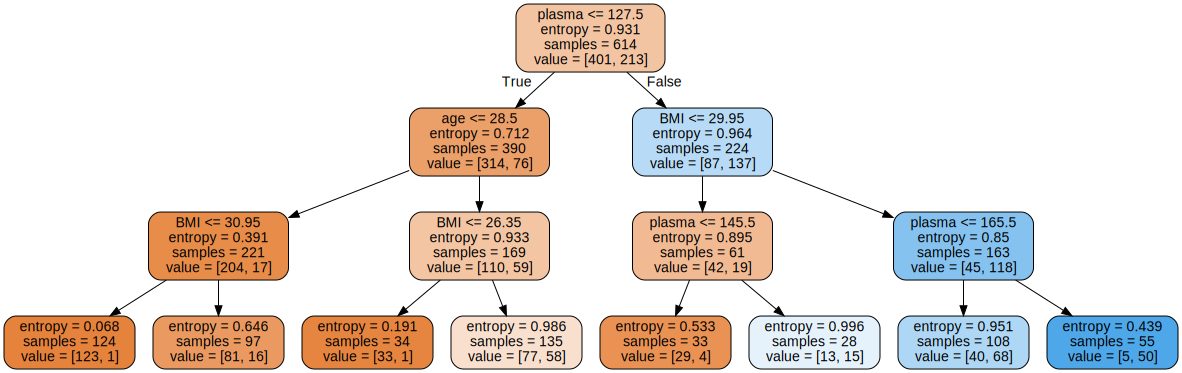

In [9]:
import graphviz
from sklearn.tree import export_graphviz

export_graphviz(dt, # the model we trained
                out_file="mytree.dot", # name of the output file - has to be a .dot file
                feature_names=X.columns, # the names of our features
                filled=True, # formatting: do we want to fill the features with colour
                rounded=True # formatting: do we want rounded edges
               )

# then, open the file using Python
with open("./mytree.dot") as f:
    dot_graph = f.read()

# visualize using graphviz, you won't be able to "open" it using normal methods
graphviz.Source(dot_graph)

To interpret the output, visit this thread over here: https://stackoverflow.com/questions/47503575/what-do-the-values-that-graphviz-renders-inside-each-node-of-a-decision-tree-m

## Class Discussion Classification Exercise 2
Here's a scatter plot that shows varying values of the DT given a higher percentage of training data size.
- What seems to be the best size of training data?
- Is it a good idea to have a training set that big?

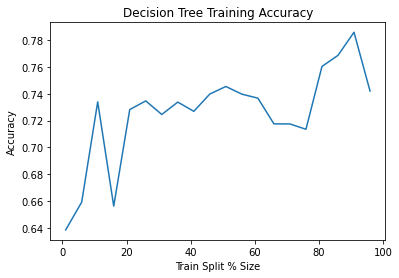

In [10]:
import matplotlib.pyplot as plt

# create split sizes from 1 to 100 in intervals of 5
split_sizes = range(1, 101, 5)

# initialise a dictionary of results
results = {}

for split in split_sizes:
    # train test split with the given split size
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = split/100, 
                                      test_size=(1 - split/100), random_state=42)
    
    # fit the model
    dt.fit(X_train, y_train)
    
    # predict
    y_pred = dt.predict(X_test)
    
    # assign the accuracy to the dictionary
    results[split] = accuracy_score(y_test, y_pred)
    
# plot the split sizes vs the dictionary of results
plt.plot(split_sizes, results.values())

plt.title("Decision Tree Training Accuracy")
plt.xlabel("Train Split % Size")
plt.ylabel("Accuracy")

plt.show()

---

# Regression
The dataset we will use is the Boston house prices that comes with `sklearn`. Please see the description below:

In [11]:
from sklearn import datasets 

data = datasets.load_boston()
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

For Linear Regression, you'll need the following:
- an `X` matrix (aka Design Matrix) which are the values you use to *predict*;
- and a `y` matrix (aka Predictions) which are the values you want to *predict*.

For this workshop, we'll try and predict `MEDV` (Median value of owner-occupied homes in \$1000's)

In [12]:
# Design Matrix
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
# Prediction (MEDV)
y = pd.DataFrame(data.target, columns=["MEDV"])
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


## Example Linear Model
- Let's fit a regression model using two variables `RM` (average number of rooms per dwelling) and `LSTAT` (% of lower status in the population) to predict `MEDV` (Median value of owner-occupied homes in \$1000's)
- `train_test_split` used to split our data into training and testing. We do this as we need to _evaluate_ our model on data it **has not seen before**.
- `mean_squared_error` (MSE) is a very common metric for evaluating our models' performance. It calculates the average error$^2$ and is used to compare two different models (useless on its own).
- `r2_score` (R$^2$) is another metric for evaluating the models performance (though it's actually not that good, adjusted R$^2$ is better).

#### Evaulation Metrics
- MSE: The lower the better, but only useful when _comparing_ models.
- R$^2$: Between 0 and 1, where a higher R$^2$ indicates a better fit. It's not the best metric, but it will "do the job" for this intro.

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
# Create the design matrix using the two variables
X = df[['RM', 'LSTAT']]

In [16]:
# split it so that we have 80% data for training (finding the coefficients of our model)
# and 20% for evaluating the model using MSE
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

In [17]:
# train the model
lm = LinearRegression().fit(X_train, y_train)

In [18]:
# predict values of y given our hidden test set
y_pred = lm.predict(X_test)

Let's compare the first few results

In [19]:
y_test[:5], y_pred[:5]

(array([[23.6],
        [32.4],
        [13.6],
        [22.8],
        [16.1]]),
 array([[25.50510964],
        [30.8592405 ],
        [17.42725985],
        [25.81325491],
        [19.64929972]]))

As you can see, our model seems to be roughly predicting within a reasonable amount away from the true expected predictions.

In [20]:
MSE = mean_squared_error(y_test, y_pred)
R2 = lm.score(X_test, y_test)
MSE, R2

(31.24329060178362, 0.573957741502586)

- At the moment, MSE doesn't mean much as we don't have a model to compare it to;
- but the R$^2$ suggests our model isn't doing quite well.

## Class Discussion Regression Exercise 1
Interpret and Discuss the Fitted Linear Model:
- `alpha` is the intercept parameter.
- `beta` is the array of coefficients

In [21]:
alpha = lm.intercept_
beta = lm.coef_

In [22]:
alpha, beta

(array([-3.84117708]), array([[ 5.46509877, -0.63249856]]))

In [23]:
RM = X['RM'].values
LSTAT = X['LSTAT'].values

MEDV = -3.84 + 5.47*RM -0.63*LSTAT

Questions:
- What do the coefficients indicate?
- How do we interpret it?

Let's see the differences between our predicted and true values.

In [24]:
output = pd.DataFrame(MEDV, columns=['MEDV_predicted'])
output['MEDV_actual'] = y
output

,MEDV_predicted,MEDV_actual
0,28.98785,24.0
1,25.52467,21.6
2,32.92305,34.7
3,32.58686,33.4
4,31.89619,36.2
...,...,...
501,26.13161,22.4
502,23.91600,20.6
503,30.76552,23.9
504,29.24078,22.0


## Class Discussion Regression Exercise 2
Residuals:
- A residual is defined to be the difference between the observed value (true value) and the estimated value (our prediction). If you look at the table above, you can see our results are reasonably correct.
- If our estimates are good, then the residuals should be very close to the true errors.
- For example, a model with perfect fit that can predict with 100% accuracy should have 0 residuals.

Interpret the residuals for the test and training data of the model in Example 1.

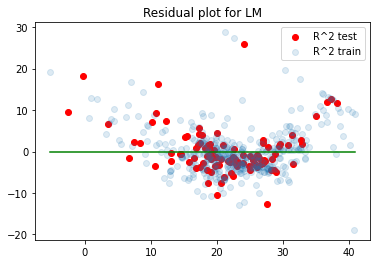

In [25]:
# make predictions
y_pred_test = lm.predict(X_test)
y_pred_train = lm.predict(X_train)

# calculate residuals
residual_test = [true_val - estimated_val for true_val, estimated_val in zip(y_test, y_pred_test)]
residual_train = [true_val - estimated_val for true_val, estimated_val in zip(y_train, y_pred_train)]

# plot residuals
plt.scatter(y_pred_test, residual_test, label='R^2 test', color='red')
plt.scatter(y_pred_train, residual_train, label='R^2 train', alpha=0.15)

# plot the 0 line (we want our residuals close to 0)
plt.plot([min(y_pred_train), max(y_pred_train)], [0,0], color='green')

plt.legend()

plt.title("Residual plot for LM")
plt.show()

1. Do the points have large residuals (differences between true and estimated)?
    - We want small residuals that are close to 0.
1. Is there a trend or bias in the residuals (i.e does the residuals look evenly spread and flat)?
    - We don't want any bias or trend.
1. Is there a pattern or correlation in the residuals (i.e is there some kind of relationship in the residuals)?
    - We don't want any correlation.

## Class Discussion Regression Exercise 3
Fit another linear model using all 13 variables to predict **MEDV**.
- Compare the results with those of the model in Question 1 looking at MSE and R$^2$

In [26]:
# create a new split criterion, but now, on the full feature space
X_train, X_test, y_train, y_test = train_test_split(df.values, y.values, test_size=0.2, random_state=42)
lm_full = LinearRegression().fit(X_train, y_train)
y_pred = lm_full.predict(X_test)

# calculate evaluation metrics
MSE = mean_squared_error(y_test, y_pred)
R2 = lm_full.score(X_test, y_test)
MSE, R2

(24.29111947497383, 0.6687594935356278)

Now our MSE metric is much more useful.
- What's the difference?
- What does it imply?

Likewise with R$^2$. Is our model better?

Here's the original model output using the two features from above:
```
MSE, R2
(31.24329060178362, 0.573957741502586)
```